# FIT5196 Assessment 1

Student Name: Jaimon Thyparambil Thomas

Student ID: 29566428

Date:14-04-2019

Environment: Python 3.6.5 and Jupyter notebook Libraries used:

nltk - natural language toolkit(tokenizer,PorterStemmer,tag,collocations,FreqDist,wordnet,MWETokenizer,RegexpTokenizer)

re (for regular expression)

tabula (for reading pdf into data frames)

matplotlib for ploting graphs

# Importing the Necessary Libraries

In [1]:
import re
from tabula import read_pdf
from nltk.tokenize import RegexpTokenizer
from nltk import collocations
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk import tag
from nltk import FreqDist
from nltk.corpus import wordnet
import matplotlib.pyplot as plt

# Task 2: Text Pre-Processing 

## Introduction
This assessment touches on the next step of analyzing textual data, i.e., converting the extracted data into a proper format. In  this assessment, we will preprocess a set of unit information and convert them into numerical representations (which are
suitable for input into recommender-systems/ information-retrieval algorithms). The data-set that we will be using contains 400 unit information crawled from Monash University.

## Reading the data in the pdf into a data frame

In [2]:
df = read_pdf("29566428.pdf",encoding="utf-8",spreadsheet=True,pages="all")
df.head()

,Title,Synopsis,Outcomes
0,MKB2705,Research and research reporting helps business...,"['explain the research process', 'identify a b..."
1,SWK2110,This unit will broadly explore the legal manda...,"['Outline the origins and purpose of the law, ..."
2,AZA3453,The unit introduces critical and practical app...,['Understand the uses of quantitative and qual...
3,MGC2230,This unit provides a framework for understandi...,['define the nature and purpose of the field o...
4,MMT5004,This unit is an extension of the minor thesis ...,['NA']


## Extracting the Stop Words

In [3]:
def getStopWordsSet():
    stopwords_list = []
    file = open("stopwords_en.txt", "r")
    for each in file:
        stopwords_list.append(each.replace("\n",""))
    file.close()
    return set(stopwords_list)

stopwords_set = getStopWordsSet()
stopwords_set

{'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [4]:
tokensUnitWise = [None]*df.shape[0] #Global variable used to store tokens based on unit
entireTokens = [] #Global variable used to extract entire list of tokens

#Initailizing a tokenizer function to extarct all the tokens of the units
def tokenizer(string):
    string = re.sub(r'^([\'\[\w]+)', lambda m: m.group(0).lower(), string) #Converting first letter to lower
    #Converting all words with a preceding symbol like .,?,\' etc is converted to
    string = re.sub(r'[.\'!?:;][\s]*\w+', lambda m: m.group(0).lower(), string) 
    tokenizer = RegexpTokenizer(r'(?:\w+(?:[-.]\w+)?){3,}') #Regex used to extract tokens with atleast 3 letters
    unigram_tokens = tokenizer.tokenize(string) #unigram Tokens is been generated
    global stopwords_set
    #All the stopwords from the unigram is been removed
    newTokens = [token for token in unigram_tokens if token not in stopwords_set]
    global tokensUnitWise
    global index
    #since we have to handle to case of appending values for both synopsis and outcomes together
    tokensUnitWise[index] = tokensUnitWise[index]+ newTokens if tokensUnitWise[index]!=None else newTokens
    index+=1
    global entireTokens
    entireTokens +=newTokens #Tokens is also been added to a global list
    return string

index=0
df['Outcomes'].apply(tokenizer)
index=0
df['Synopsis'].apply(tokenizer)
print("Total No Of Words in Starting:",len(entireTokens))
print("Total No Of Vocabs in starting:",len(set(entireTokens)))
      
tokensUnitWise

Total No Of Words in Starting: 20237
Total No Of Vocabs in starting: 3969


[['explain',
  'research',
  'process',
  'identify',
  'business',
  'research',
  'problem',
  'plan',
  'research',
  'proposal',
  'design',
  'survey',
  'analyse',
  'interpret',
  'data',
  'prepare',
  'research',
  'report',
  'research',
  'research',
  'reporting',
  'helps',
  'businesses',
  'make',
  'informed',
  'decisions',
  'business',
  'strategy',
  'students',
  'taking',
  'unit',
  'gain',
  'working',
  'knowledge',
  'research',
  'methods',
  'data',
  'analysis',
  'includes',
  'problem',
  'identification',
  'hypothesis',
  'formulation',
  'statistical',
  'testing',
  'students',
  'provided',
  'practical',
  'training',
  'survey',
  'design',
  'research',
  'report',
  'writing',
  'ability',
  'analyse',
  'synthesise',
  'research',
  'data',
  'highly',
  'valued',
  'industry'],
 ['outline',
  'origins',
  'purpose',
  'law',
  'including',
  'human',
  'rights',
  'considerations',
  'applicable',
  'children',
  'older',
  'people',
  'identif

### Top 200 bigrams is been Extracted

In [5]:
#Function used to extarct bigrams
def getBigrams(wordsList,n):
    bigram_measures = collocations.BigramAssocMeasures()
    finder = collocations.BigramCollocationFinder.from_words(wordsList)
    return finder.nbest(bigram_measures.pmi, n)

bigrams = getBigrams(entireTokens,200)
bigrams

[('1608-1674', 'contemporaries'),
 ('1910-1945', 'supplemented'),
 ('2004', 'Vic'),
 ('AFS1000', 'AFW1000'),
 ('AFW1000', 'ACW1000'),
 ('ATS1316', 'ATS1317'),
 ('Advice', 'SoA'),
 ('Archivio', 'Stato'),
 ('Asia-Pacific', 'region'),
 ('Athenian', 'playwrights'),
 ('Athens', '5th'),
 ('Australasia', 'Pacific'),
 ('Bachelor', 'Business'),
 ('Based', 'Medicine'),
 ('Bayes', 'theorem'),
 ('Benefits', 'Scheme'),
 ('Burke', 'Marx'),
 ('Business', 'Administration'),
 ('CSS3', 'JavaScript'),
 ('Care', 'Nurses'),
 ('Cicero', 'Suetonius'),
 ('College', 'Critical'),
 ('Conduct', 'applies'),
 ('Conference', 'Harmonisation'),
 ('Council', 'NHMRC'),
 ('Criminology', 'Overseas'),
 ('Critical', 'Care'),
 ('Cycle', 'Analysis'),
 ('Datini', 'Online'),
 ('Dematerialisation', 'Reduction'),
 ('Desktop', 'Enterprise'),
 ('Dietitians', 'Association'),
 ('Donne', '1572-1631'),
 ('ECGs', 'blood'),
 ('Empires', 'moving'),
 ('Evidence', 'Based'),
 ('Family', 'Law'),
 ('Gacaca', 'village'),
 ('HTML5', 'CSS3'),
 ('

In [6]:
#Function Used to Extract new list of tokens along with the bigrams
def getNewTokensWithBigrams(tokens,bigrams,unique=True):
    uni_voc = list(set(tokens))
    uni_voc += bigrams
    mwe_tokenizer = MWETokenizer(uni_voc)
    mwe_tokens = mwe_tokenizer.tokenize(tokens)
    return set(mwe_tokens) if unique else mwe_tokens

mweTokensUnique = getNewTokensWithBigrams(entireTokens,bigrams)
mweTokens = getNewTokensWithBigrams(entireTokens,bigrams,False)
mweTokensUnique

{'signs',
 'years',
 'resilient',
 'epidemiology',
 'newsrooms',
 'sophisticated',
 'requires',
 'coordinated',
 'musical',
 'components',
 'goals',
 'modalities',
 'explanatory',
 'couple',
 'harmony',
 'teacher',
 'conscious_crafting',
 'Dietitians_Association',
 'political',
 'renal',
 'addictive',
 'correlation',
 'materials',
 'banks',
 '2019',
 'cache',
 'proposal',
 'shares',
 'entail_selections',
 'CPS',
 'aimed',
 'mohr',
 'developments',
 'approximations',
 'considered',
 'debt',
 'injured',
 'joints',
 'viable',
 'self-awareness',
 'clearer',
 'real',
 'authentic',
 'organisational',
 'information',
 'post-colonialism',
 'SPSS',
 'subjectivity',
 'Governance',
 'industries',
 'gaps',
 'subsystems',
 'business',
 'compatibility',
 'challenging',
 'crime',
 'imposed',
 'theoretical',
 'post-harvest',
 'elasticity',
 'Arts',
 'caching',
 'publishing',
 'varied',
 'trajectories',
 'core',
 'identity',
 'drugs',
 'system',
 'language',
 'terrorism',
 'taking',
 'focus',
 'MBA_Tra

In [7]:
#Function used to categorise the words into repective groups like verb etc
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Function where stemming is been applied to tokens
def getstemming(mweTokens,unique=True):
    final_tokens =[]
    tagged_sent = tag.pos_tag(mweTokens)
    stemmer = PorterStemmer()
    final_tokens = final_tokens + [stemmer.stem(w[0]) for w in tagged_sent]
    return sorted(list(set(final_tokens))) if unique else final_tokens

StemmedTokensUnique = getstemming(list(mweTokensUnique))
StemmedTokens = getstemming(list(mweTokens),False)
StemmedTokensUnique

['1000',
 '102',
 '1564-1616',
 '1580-1660',
 '18000',
 '1910-1945_supplement',
 '1968',
 '1968.the',
 '2000',
 '2004_vic',
 '2014',
 '2019',
 '20th',
 '21st',
 '22-week',
 '300',
 '4-week',
 '500',
 'aasb',
 'aasw',
 'abdomen',
 'abil',
 'abnorm',
 'aborigin',
 'abort',
 'abroad',
 'absorpt',
 'abstract',
 'abus',
 'ac',
 'academ',
 'academia',
 'acceler',
 'accept',
 'access',
 'accessori',
 'accident',
 'accompani',
 'accord',
 'account',
 'accur',
 'accuraci',
 'achiev',
 'achievable_measur',
 'acknowledg',
 'acoust',
 'acquaint',
 'acquir',
 'acquisit',
 'acs1002',
 'act',
 'action',
 'activ',
 'actor',
 'acts_omiss',
 'actual',
 'acut',
 'acw1000',
 'acx4040',
 'adapt',
 'adaptations_biom',
 'add',
 'addict',
 'addit',
 'address',
 'adds_continu',
 'adjustments_clos',
 'administer_scor',
 'administr',
 'admixtur',
 'adob',
 'adolesc',
 'adopt',
 'adsorption_ion-exchang',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advisori',
 'advoc',
 'advocaci',
 'aerodynamics_ae

### Extracting the 5% Rare Tokens

In [8]:
freqDistributionEntireTokens = FreqDist(list(StemmedTokens))
sortedFreqDistEntireTokens = sorted(freqDistributionEntireTokens, key=freqDistributionEntireTokens.get)
rareTokens = sortedFreqDistEntireTokens[:int(len(sortedFreqDistEntireTokens)*.05)]
print(len(rareTokens))
rareTokens

125


['tension',
 'non-scienc',
 'ethnographi',
 'story-tel',
 'html',
 'emb',
 'disrupt',
 'versu',
 'increment',
 'applianc',
 'cad',
 'caa',
 'autom',
 'precis',
 'cam',
 'meteorolog',
 'abus',
 'photographi',
 'bones_intra-abdomin',
 'intra-thorac',
 'offenc',
 'consensu',
 'conclus',
 'collapse_gunpowd',
 'muslim-major',
 'onward',
 'non-western',
 'poster',
 'competent_practition',
 'psychiatri',
 'psychopharmacolog',
 'electroconvuls',
 'milieu',
 'dependency_seclus',
 'snoezelen',
 'lie',
 'nhow',
 'alien',
 'accept',
 'case-bas',
 'terrorist',
 'perpetr',
 'deduc',
 'assemble_breadth',
 'undergo',
 'psychrometr',
 'cooling_humidif',
 'dehumidification_reheat',
 'preheat',
 'pipe',
 'estim',
 'lab',
 'attain',
 'accuraci',
 'phrase',
 'tone',
 'convincingli',
 'hedg',
 'bfw3651',
 'factual',
 'multi-sourc',
 'non-stat',
 'woman',
 'torres_strait',
 'island',
 'asia-pacific_region',
 'inter-hospit',
 'prepared',
 'lobbi',
 'prejudic',
 'lack',
 'commit',
 'organiz',
 'liais',
 'mutua

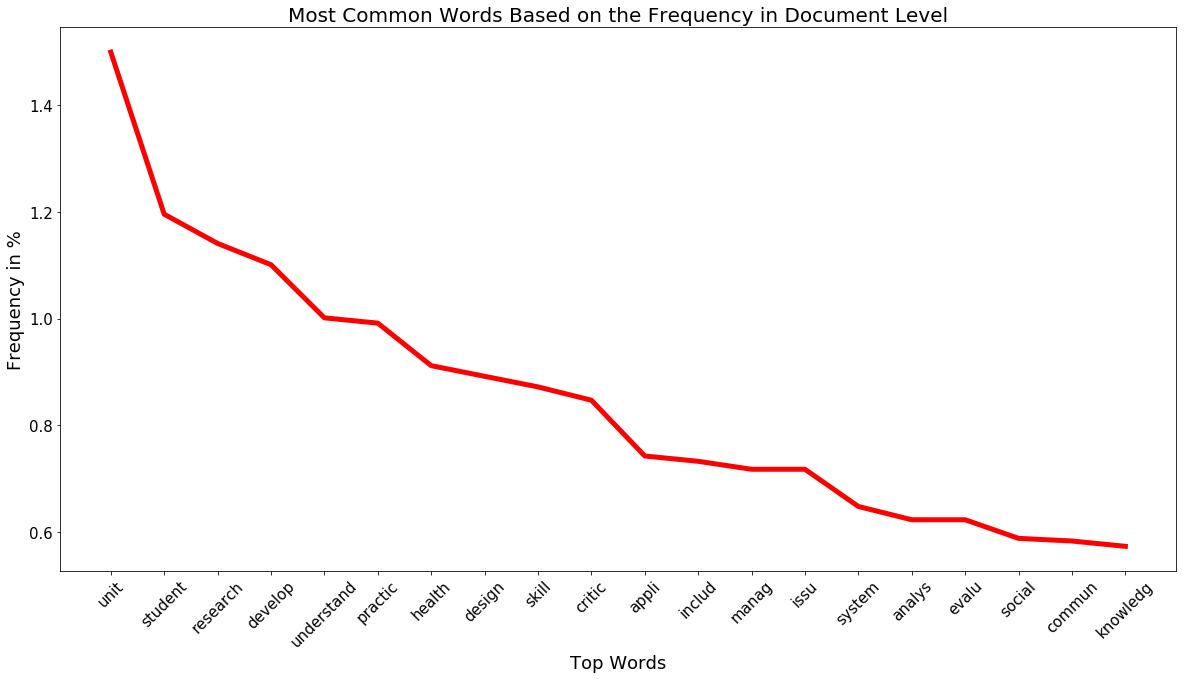

In [9]:
plt.figure(figsize = (20,10))
top20 = freqDistributionEntireTokens.most_common(20)
totalNoOfWords = len(StemmedTokens)
keys = []
value =[]
for each in top20:
    keys.append(each[0])
    value.append((each[1]/totalNoOfWords)*100)
plt.plot(keys, value, color = 'red', linewidth=5.0)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Top Words',fontsize=18)
plt.ylabel('Frequency in %',fontsize=18)
plt.title('Most Common Words Based on the Frequency in Document Level',fontsize=20)
plt.show()

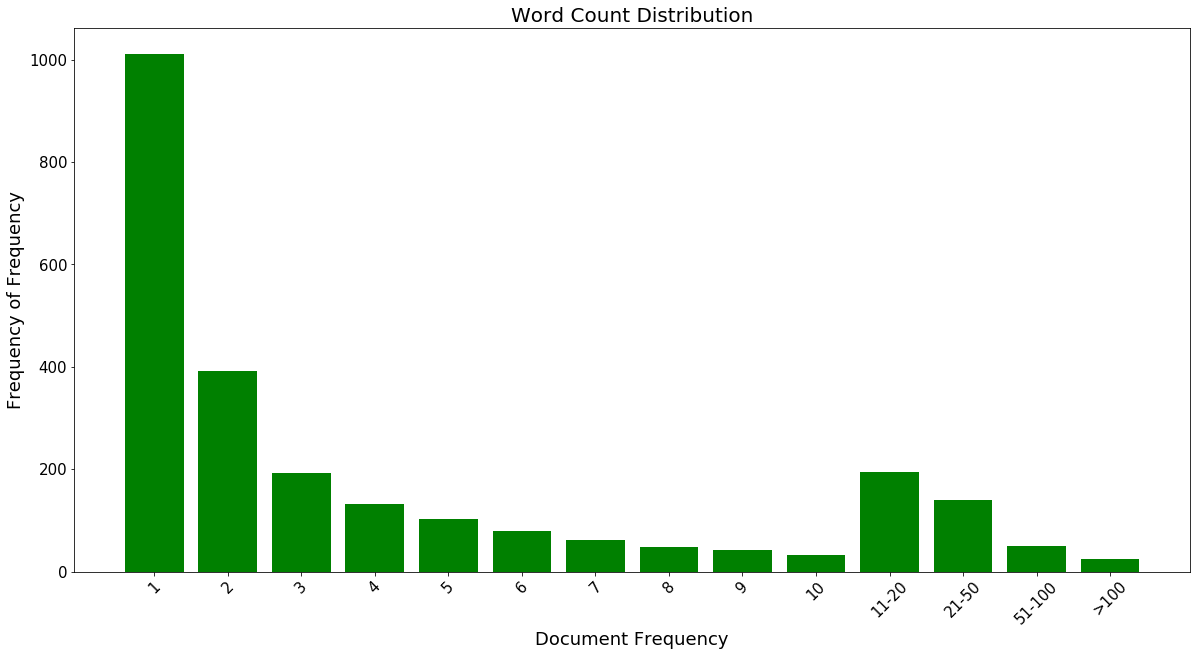

In [10]:
plt.figure(figsize = (20,10))
value =[0]*14

keyVal=[]
for i in range(10):
    keyVal.append(str(i+1))
keyVal.append("11-20")
keyVal.append("21-50")
keyVal.append("51-100")
keyVal.append(">100")

for key,val in freqDistributionEntireTokens.items():
    if val < 11:
        value[val-1] +=1
    elif val < 21:
        value[10] +=1
    elif val < 51:
        value[11] +=1
    elif val < 100:
        value[12] +=1
    else:
        value[13] +=1
plt.bar(keyVal,value, color='green')
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Document Frequency',fontsize=18)
plt.ylabel('Frequency of Frequency',fontsize=18)
plt.title('Word Count Distribution',fontsize=20)
plt.show()

### Removing the rare tokens from the Stemmed tokens we found earlier

In [11]:
newStemmedTokens = [token for token in StemmedTokensUnique if token not in rareTokens]
print("Previous StemmedTokens Length:",len(StemmedTokensUnique))
print("StemmedTokens Length after removing rare tokens :",len(newStemmedTokens))
print("Total No of Words After Wrangling:",len(StemmedTokens))
print("Total No of Vocabs After Wrangling:",len(newStemmedTokens))
newStemmedTokens

Previous StemmedTokens Length: 2506
StemmedTokens Length after removing rare tokens : 2381
Total No of Words After Wrangling: 20073
Total No of Vocabs After Wrangling: 2381


['102',
 '1564-1616',
 '1580-1660',
 '18000',
 '1910-1945_supplement',
 '1968',
 '1968.the',
 '2000',
 '2014',
 '2019',
 '20th',
 '21st',
 '22-week',
 '4-week',
 '500',
 'aasb',
 'aasw',
 'abdomen',
 'abil',
 'abnorm',
 'aborigin',
 'abort',
 'abroad',
 'absorpt',
 'abstract',
 'ac',
 'academ',
 'academia',
 'acceler',
 'access',
 'accessori',
 'accident',
 'accompani',
 'accord',
 'account',
 'accur',
 'achiev',
 'achievable_measur',
 'acknowledg',
 'acoust',
 'acquaint',
 'acquir',
 'acquisit',
 'acs1002',
 'act',
 'action',
 'activ',
 'actor',
 'acts_omiss',
 'actual',
 'acut',
 'acw1000',
 'acx4040',
 'adapt',
 'adaptations_biom',
 'add',
 'addict',
 'addit',
 'address',
 'adds_continu',
 'adjustments_clos',
 'administer_scor',
 'administr',
 'admixtur',
 'adob',
 'adolesc',
 'adopt',
 'adsorption_ion-exchang',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advisori',
 'advoc',
 'advocaci',
 'aerodynamics_aeronaut',
 'aeromed',
 'aerospac',
 'aesthet',
 'aetiolog',
 'af

### Writing into Vocab File

In [12]:
#Function used for writting the vocabs into a file
def writeVocab(StemmedTokens,filename):
    file = open(filename, "w")
    vocabDict = {}
    index = 1
    for each in StemmedTokens:
        vocabDict[each] = index
        res = each + ":" + str(index)
        file.write(res if index == 1 else "\n" + res)
        index += 1
    file.close()
    return vocabDict

vocabDict = writeVocab(newStemmedTokens,"29566428_vocab.txt")

In [13]:
#Function used For applying Stemming and Bigram in Unit Level
def applyStemmingAndBigramsUnitWise(bigrams,rareTokens):
    for i in range(len(tokensUnitWise)):
        tempTokens = tokensUnitWise[i]
        tempMWETokens = getNewTokensWithBigrams(tempTokens, bigrams,False)
        tempTokens = getstemming(list(tempMWETokens),False)
        tokensUnitWise[i] = [token for token in tempTokens if token not in rareTokens] # removing rare tokens
    return tokensUnitWise

tokensUnitWise = applyStemmingAndBigramsUnitWise(bigrams,rareTokens)

### Writing into count vector file

In [14]:
#Function used to find unit wise the vocabs used and its frequency and to write it to a file
def writeCountVector(tokensUnitWise,vocabDict,filename):
    file = open(filename, "w")
    for i in range(len(tokensUnitWise)):
        s = df['Title'][i] if i==0 else "\n"+df['Title'][i]
        for k, v in FreqDist(tokensUnitWise[i]).items():
            s+=" {}:{}".format(vocabDict[k], v)
        file.write(s)
    file.close()
    return

writeCountVector(tokensUnitWise,vocabDict,"29566428_countVec.txt")

### Summary
######################### Text Statistics Before Wrangling ##################################

Total number of words: 20237<br>
Total number of vocabs: 3969<br>
Lexical diversity is : 19.61 %<br>

######################### Final Text Statistics After Wranling ##################################

Total number of words: 20073<br>
Total number of vocabs: 2381<br>
Lexical diversity is : 11.86 %<br>